In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()


In [31]:
df1 = pd.read_csv("../results/fbs/ab-main-main-2022-09-22T15:20:59+02:00/v1.csv.gz")
df2 = pd.read_csv("../results/fbs/ab-main-main-2022-09-22T15:20:59+02:00/v2.csv.gz")

# df1 = pd.read_csv("../results/fbs/ab-main-main-2022-09-22T12:29:40+02:00/v1.csv.gz")
# df2 = pd.read_csv("../results/fbs/ab-main-main-2022-09-22T12:29:40+02:00/v2.csv.gz")
# df1 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-22T13:20:43+02:00/v1.csv.gz")
# df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-22T13:20:43+02:00/v2.csv.gz")
# df1 = pd.read_csv("../results/fbs/ab-main-perf-issue-clean-path-2022-09-22T12:57:01+02:00/v1.csv.gz")
# df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-clean-path-2022-09-22T12:57:01+02:00/v2.csv.gz")
df = pd.concat([df1, df2])
df.head(n=30)

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,iter,method,name,scenario,status,url,extra_tags
0,http_reqs,1663852973,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
1,http_req_duration,1663852973,16.874785,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
2,http_req_blocked,1663852973,0.429095,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
3,http_req_connecting,1663852973,0.394758,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
4,http_req_tls_handshaking,1663852973,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
5,http_req_sending,1663852973,0.162569,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
6,http_req_waiting,1663852973,16.645212,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
7,http_req_receiving,1663852973,0.067004,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
8,http_req_failed,1663852973,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.35:3000/destinations,version=v1
9,http_reqs,1663852973,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.35:3000/destinations,version=v1


In [32]:
df_req_durations = df[df["metric_name"] == "http_req_duration"]\
  .groupby(['timestamp', 'extra_tags'])\
  .agg(
    count=('status', 'count'),
    request_duration_median=('metric_value', 'median'),
    request_duration_min=('metric_value', 'min'),
    request_duration_max=('metric_value', 'max')
  ).reset_index()
df_req_durations.rename(columns={'extra_tags': 'version'}, inplace=True)
df_req_durations['version'] = df_req_durations['version'].str.replace('version=', '')
df_req_durations.sort_values("timestamp", inplace=True)
df_req_durations.head(n=10)

,timestamp,version,count,request_duration_median,request_duration_min,request_duration_max
0,1663852973,v1,59,277.248488,16.874785,350.992311
1,1663852973,v2,59,318.653255,24.203604,373.418306
2,1663852974,v1,129,81.747444,7.214269,377.458686
3,1663852974,v2,140,73.545980,6.918907,375.682567
4,1663852975,v1,184,32.246315,1.725154,360.550835
5,1663852975,v2,174,44.240574,2.945352,128.714050
6,1663852976,v1,181,31.456133,0.424654,102.129142
7,1663852976,v2,184,32.401033,3.448661,91.440645
9,1663852977,v2,180,33.715752,0.388718,123.449092
8,1663852977,v1,178,40.347022,1.330764,163.154245


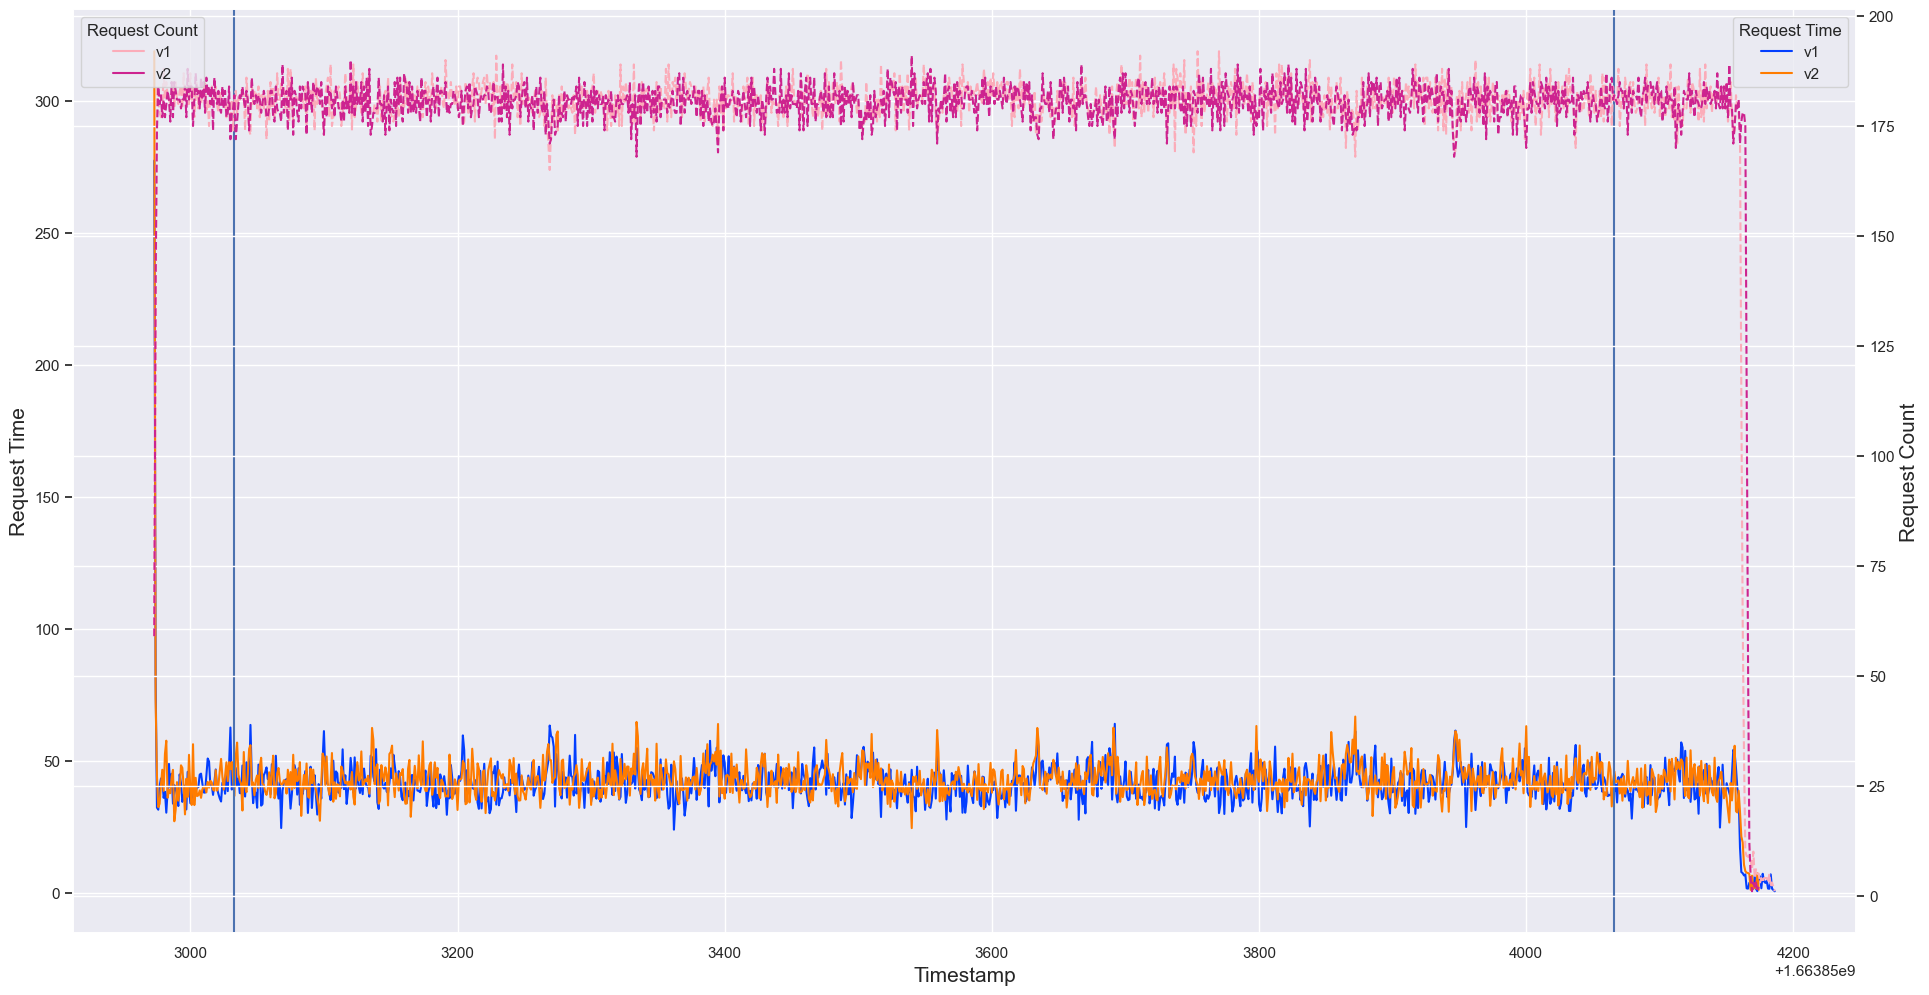

In [33]:
# remove 120 seconds from the last ts
# maxCutoffTs = df_req_durations['timestamp'].max() - 660
maxCutoffTs = df_req_durations['timestamp'].max() - 120
# add 60 seconds to the first ts
minCutoffTs = df_req_durations['timestamp'].min() + 60


# plot
paletteTime = sns.color_palette("bright", 2)
paletteCount = sns.color_palette("RdPu", 2)

sns.set(rc={'figure.figsize':(23,12)})
g = sns.lineplot(data = df_req_durations, x='timestamp', y='request_duration_median', hue='version', palette=paletteTime)
g.axvline(maxCutoffTs)
g.axvline(minCutoffTs)
g.set_xlabel("Timestamp", fontsize = 15)
g.set_ylabel("Request Time", fontsize = 15)
# g.set_ylim([0, 8500])
g.legend(title="Request Time")
ax2 = g.twinx()
ax2.set_ylabel("Request Count", fontsize = 15)
#ax2.set_ylim([0, 2000])
g2 = sns.lineplot(data = df_req_durations, x='timestamp', y='count', hue='version', ax=ax2, palette=paletteCount, linestyle="--")
g2.legend(title="Request Count", loc = 'upper left')

In [34]:
# enforce cutoff
df_filtered = df_req_durations[(df_req_durations['timestamp'] >= minCutoffTs) & (df_req_durations['timestamp'] <= maxCutoffTs)]
df_filtered

,timestamp,version,count,request_duration_median,request_duration_min,request_duration_max
121,1663853033,v2,182,36.685000,3.204522,103.339715
120,1663853033,v1,181,47.281219,2.157644,126.826663
122,1663853034,v1,183,47.234706,1.515940,126.391398
123,1663853034,v2,172,51.625402,14.227629,149.174385
124,1663853035,v1,178,40.577292,8.146609,98.856519
...,...,...,...,...,...,...
2183,1663854064,v2,186,32.690319,1.618363,103.161263
2184,1663854065,v1,184,40.368421,2.027551,103.672368
2185,1663854065,v2,181,42.277937,2.073818,122.680873
2187,1663854066,v2,182,45.907516,1.677660,98.217946


In [35]:
v1Shape = df_filtered[df_filtered['version'] == 'v1'].shape
v2Shape = df_filtered[df_filtered['version'] == 'v2'].shape
assert v1Shape[0] == v2Shape[0]
measurementIndexesSize = v1Shape[0]
measurementIndexesSize

1034

In [36]:
def bootstrap(perfRuntimes1: pd.DataFrame, perfRuntimes2: pd.DataFrame):
  numberOfSamples = 10000
  allRuntimes1 = perfRuntimes1['request_duration_median'].to_numpy()
  allRuntimes2 = perfRuntimes2['request_duration_median'].to_numpy()
  currentMeasurementIndexes = rng.choice(measurementIndexesSize, size=(measurementIndexesSize, numberOfSamples))

  # Bulk selection
  tmp1 = allRuntimes1[currentMeasurementIndexes]
  tmp1 = np.stack(tmp1, axis=1)
  tmp2 = allRuntimes2[currentMeasurementIndexes]
  tmp2 = np.stack(tmp2, axis=1)

  # Get median for both lists
  med1 = np.median(tmp1, axis=1)
  med2 = np.median(tmp2, axis=1)
  R = med2/med1
  R.sort()

  CIsmall = 1 # 99% confidence interval
  small = int((numberOfSamples * CIsmall) / 100 / 2)
  if small == 0: small = 1
  minSmall = R[small-1]
  minSmall = (minSmall - 1) * 100
  maxSmall = R[numberOfSamples-small-1]
  maxSmall = (maxSmall - 1) * 100
  instability = maxSmall - minSmall
  return minSmall, maxSmall, instability

In [37]:
runtimes1 = df_filtered[df_filtered["version"] == 'v1']
runtimes2 = df_filtered[df_filtered["version"] == 'v2']
median1 = runtimes1['request_duration_median'].median()
median2 = runtimes2['request_duration_median'].median()
change = ((median2/median1) - 1) * 100
minci, maxci, instability = bootstrap(runtimes1, runtimes2)
assert maxci >= change
assert change >= minci
print(f"performance change: {change:.2f}% [{minci:.2f} - {maxci:.2f}] ({instability:.2f}%)")

performance change: 2.75% [0.63 - 4.44] (3.81%)
